# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

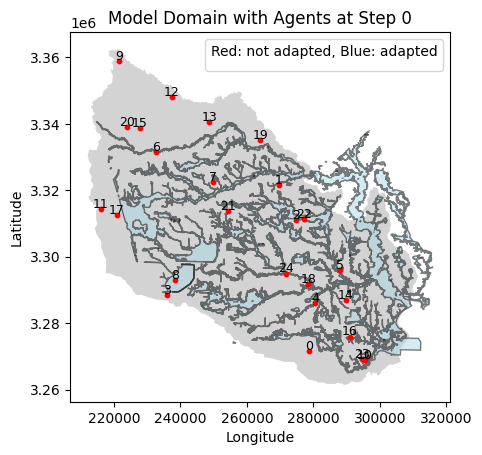

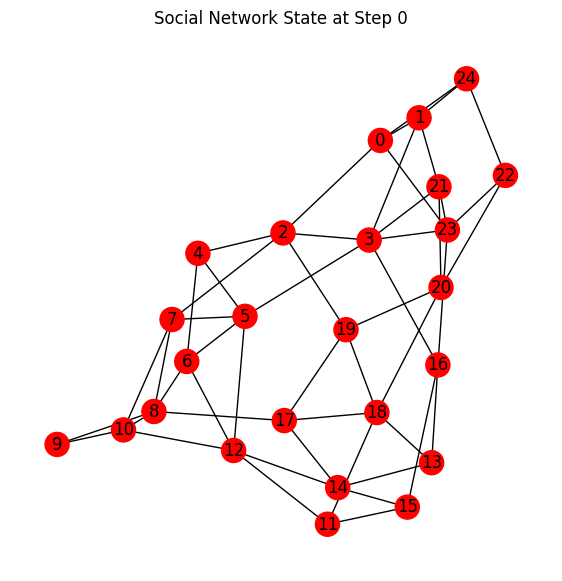

<Figure size 1000x600 with 0 Axes>

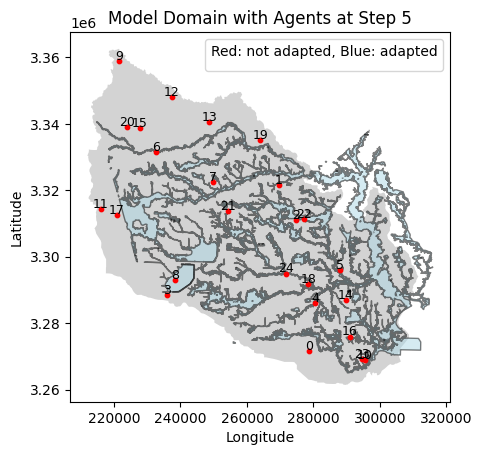

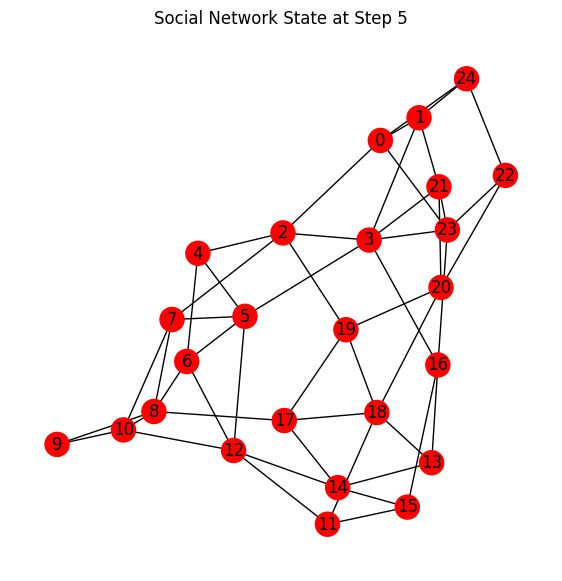

<Figure size 1000x600 with 0 Axes>

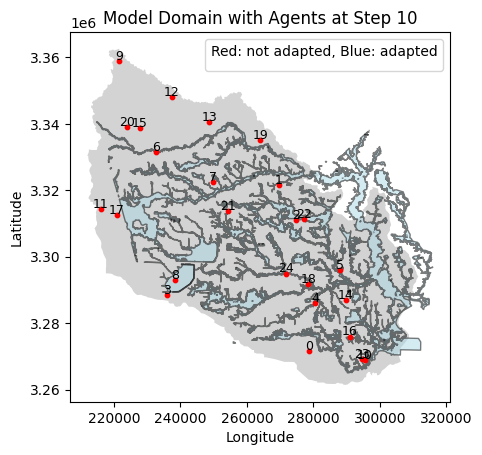

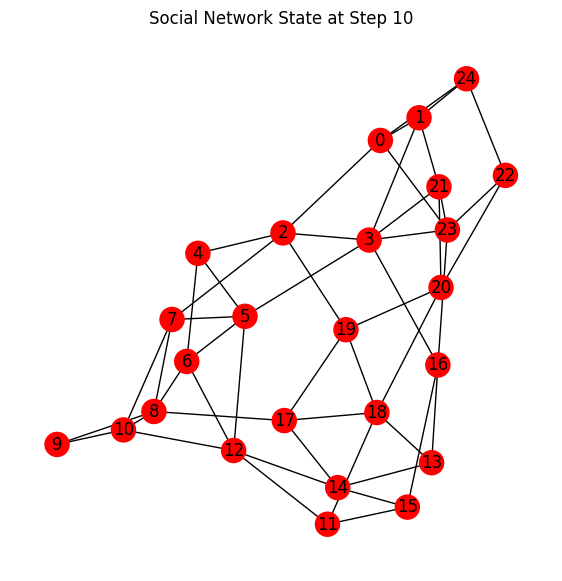

<Figure size 1000x600 with 0 Axes>

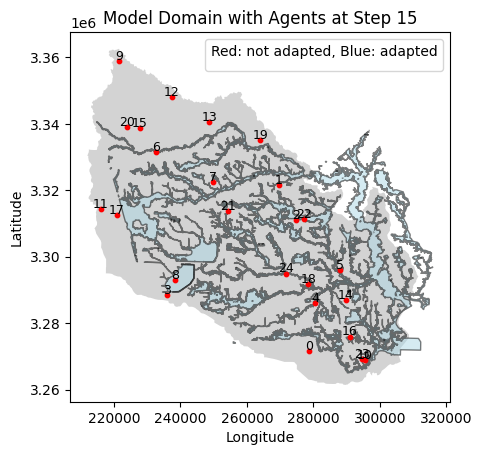

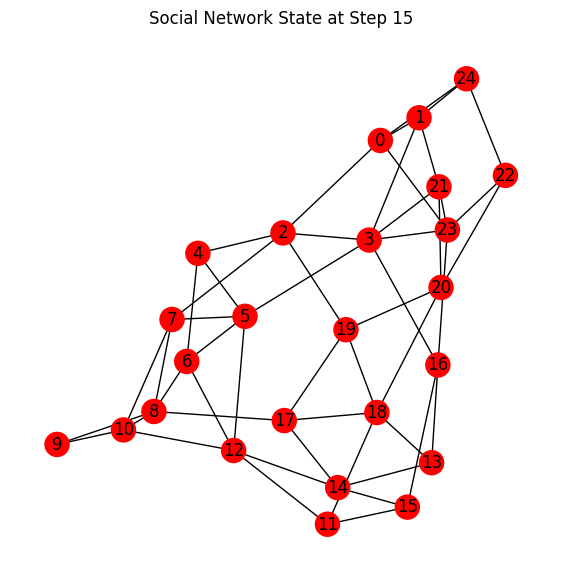

<Figure size 1000x600 with 0 Axes>

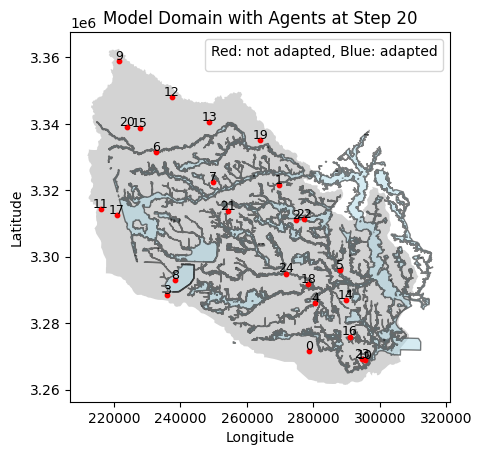

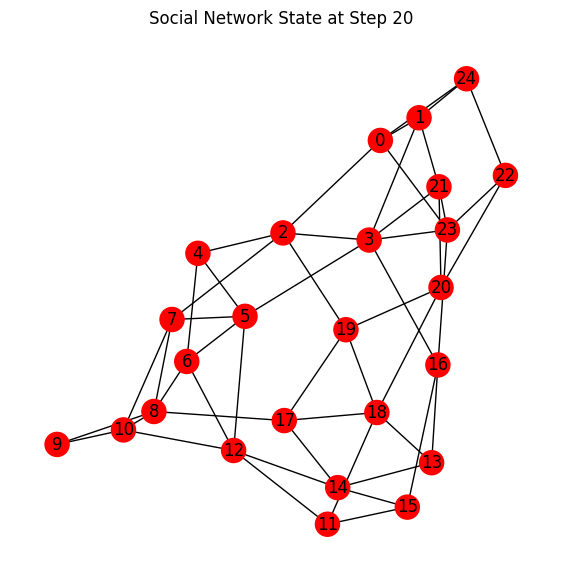

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=25, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   2.335547         158774.248548          0.000000   
     1                   2.819944          31367.852322          0.000000   
     2                   0.251091          72163.458722          0.000000   
     3                   0.655863          15396.105412          0.000000   
     4                   1.264071          48336.048801          0.000000   
...                           ...                   ...               ...   
19   20                  0.614601          61256.354369          0.549202   
     21                  0.731289          84204.665057          0.597492   
     22                  0.191082          16705.868662          0.197419   
     23                  0.411098          34193.105630          0.450033   
     24                 -2.832723              0.000000          3.451592   

              FloodDamageActual  IsAdapted  AdaptationDepth  \
Step AgentID                                                  
0    0                 0.000000      False              0.0   
     1                 0.000000      False              0.0   
     2                 0.000000      False              0.0   
     3                 0.000000      False              0.0   
     4                 0.000000      False              0.0   
...                         ...        ...              ...   
19   20            59120.225428      False              0.0   
     21            79200.408623      False              0.0   
     22            16970.701178      False              0.0   
     23            35288.688434      False              0.0   
     24           230281.202815      False              0.5   

                                                   location  HouseSize  \
Step AgentID                                                             
0    0        POINT (278674.45335406484 3271576.5381284636)        253   
     1          POINT (269656.2484853382 3321552.826794794)         48   
     2          POINT (274891.089164849 3311072.1622795234)        225   
     3        POINT (235936.01813262227 3288522.4403736647)         34   
     4        POINT (280581.67348394566 3286077.9805692937)         89   
...                                                     ...        ...   
19   20         POINT (223885.77856782672 3339092.68541575)        138   
     21        POINT (254393.05725549595 3313750.159233558)        180   
     22        POINT (277260.4449691057 3311461.4109258982)         59   
     23         POINT (294711.0822042266 3269205.850609747)         88   
     24       POINT (271769.54635550943 3294946.2669440606)        338   

              Income   IncomeLabel  Savings OptimalMeasure  \
Step AgentID                                                 
0    0         22523  Middle-Class      0.0           None   
     1          2130          Poor      0.0           None   
     2         93950          Rich      0.0           None   
     3          6154          Poor      0.0           None   
     4         12733  Middle-Class      0.0           None   
...              ...           ...      ...            ...   
19   20         4128          Poor   7843.2           None   
     21        28877  Middle-Class  54866.3           None   
     22         3775          Poor   7172.5           None   
     23         4172          Poor   7926.8           None   
     24        29642  Middle-Class  37729.8           None   

              OwnFloodPerception  NetworkPerception  
Step AgentID                                         
0    0                         4                  0  
     1                         2                  0  
     2                         2                  0  
     3                         2                  0  
     4                         4                  0  
...                          ...            

In [3]:
condition = (agent_data['OwnFloodPerception'] == 4)
result_df = agent_data[condition]

result_df[['FloodDepthEstimated','FloodDamageEstimated','IsAdapted','AdaptationDepth','Income','IncomeLabel', 'Savings', 'OptimalMeasure',
           'NetworkPerception','OwnFloodPerception']]

result_df

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   2.335547         158774.248548               0.0   
     4                   1.264071          48336.048801               0.0   
     5                   0.000000              0.000000               0.0   
     10                  0.449437          76156.851459               0.0   
     18                  0.000000              0.000000               0.0   
     19                  0.212219          38090.922444               0.0   
     22                  0.191082          16705.868662               0.0   
1    9                   0.000000              0.000000               0.0   
     20                  0.614601          61256.354369               0.0   
     21                  0.731289          84204.665057               0.0   
     22                  0.191082          16705.868662               0.0   
     23                  0.411098          34193.105630               0.0   

              FloodDamageActual  IsAdapted  AdaptationDepth  \
Step AgentID                                                  
0    0                      0.0      False              0.0   
     4                      0.0      False              0.0   
     5                      0.0      False              0.0   
     10                     0.0      False              0.0   
     18                     0.0      False              0.0   
     19                     0.0      False              0.0   
     22                     0.0      False              0.0   
1    9                      0.0      False              0.0   
     20                     0.0      False              0.0   
     21                     0.0      False              0.0   
     22                     0.0      False              0.0   
     23                     0.0      False              0.0   

                                                   location  HouseSize  \
Step AgentID                                                             
0    0        POINT (278674.45335406484 3271576.5381284636)        253   
     4        POINT (280581.67348394566 3286077.9805692937)         89   
     5         POINT (288114.4435385986 3296019.0300644487)         93   
     10        POINT (295517.71905014623 3268849.957666738)        190   
     18        POINT (278445.1782789831 3291716.4097615643)        360   
     19        POINT (264029.6042657334 3335235.8082259586)        128   
     22        POINT (277260.4449691057 3311461.4109258982)         59   
1    9         POINT (221536.95767844966 3359022.357258038)        103   
     20         POINT (223885.77856782672 3339092.68541575)        138   
     21        POINT (254393.05725549595 3313750.159233558)        180   
     22        POINT (277260.4449691057 3311461.4109258982)         59   
     23         POINT (294711.0822042266 3269205.850609747)         88   

              Income   IncomeLabel  Savings OptimalMeasure  \
Step AgentID                                                 
0    0         22523  Middle-Class      0.0           None   
     4         12733  Middle-Class      0.0           None   
     5          4861          Poor      0.0           None   
     10        50653  Middle-Class      0.0           None   
     18        83193          Rich      0.0           None   
     19         5485          Poor      0.0           None   
     22         3775          Poor      0.0           None   
1    9          3235          Poor    323.5           None   
     20         4128          Poor    412.8       Sandbags   
     21        28877  Middle-Class   2887.7         Drains   
     22         3775          Poor    377.5           None   
     23         4172          Poor    417.2       Sandbags   

              OwnFloodPerception  NetworkPerception  
Step AgentID                                         
0    0                         4      

In [4]:
agent_data.index

MultiIndex([( 0,  0),
            ( 0,  1),
            ( 0,  2),
            ( 0,  3),
            ( 0,  4),
            ( 0,  5),
            ( 0,  6),
            ( 0,  7),
            ( 0,  8),
            ( 0,  9),
            ...
            (19, 15),
            (19, 16),
            (19, 17),
            (19, 18),
            (19, 19),
            (19, 20),
            (19, 21),
            (19, 22),
            (19, 23),
            (19, 24)],
           names=['Step', 'AgentID'], length=500)

In [7]:
result_df_xs = agent_data.xs(key=16, level='AgentID', axis=0, drop_level=False)

# Using .loc indexer
agent15 = agent_data.loc[(slice(None), 16), :]

agent15

,,FloodDepthEstimated,FloodDamageEstimated,FloodDepthActual,FloodDamageActual,IsAdapted,AdaptationDepth,location,HouseSize,Income,IncomeLabel,Savings,OptimalMeasure,OwnFloodPerception,NetworkPerception
Step,AgentID,,,,,,,,,,,,,,
0,16,0.59262,65392.486419,0.000000,0.000000,False,0.0,POINT (290910.3431441365 3275973.3102996),149,5639,Poor,0.0,None,2,0
1,16,0.59262,65392.486419,0.000000,0.000000,False,0.0,POINT (290910.3431441365 3275973.3102996),149,5639,Poor,563.9,Sandbags,3,3
2,16,0.59262,65392.486419,0.000000,0.000000,False,0.0,POINT (290910.3431441365 3275973.3102996),149,5639,Poor,1127.8,None,2,2
3,16,0.59262,65392.486419,0.000000,0.000000,False,0.0,POINT (290910.3431441365 3275973.3102996),149,5639,Poor,1691.7,None,2,2
4,16,0.59262,65392.486419,0.000000,0.000000,False,0.0,POINT (290910.3431441365 3275973.3102996),149,5639,Poor,2255.6,None,2,2
5,16,0.59262,65392.486419,0.639765,66961.726317,False,0.0,POINT (290910.3431441365 3275973.3102996),149,5639,Poor,2819.5,None,2,2
6,16,0.59262,65392.486419,0.639765,66961.726317,False,0.0,POINT (290910.3431441365 3275973.3102996),149,5639,Poor,3383.4,None,2,2
7,16,0.59262,65392.486419,0.639765,66961.726317,False,0.0,POINT (290910.3431441365 3275973.3102996),149,5639,Poor,3947.3,None,2,2
8,16,0.59262,65392.486419,0.639765,66961.726317,False,0.0,POINT (290910.3431441365 3275973.3102996),149,5639,Poor,4511.2,None,2,2


In [6]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_adapted_households
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
